In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading Dataset

In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from glob import glob

In [3]:
IMAGE_SIZE = 64

In [4]:
train_path = '/content/drive/MyDrive/Dataset/CBIS-DDSM/jpeg_shape_classes/train'
test_path = '/content/drive/MyDrive/Dataset/CBIS-DDSM/jpeg_shape_classes/test'

In [5]:
from PIL import Image
import os
from IPython.display import display
from IPython.display import Image as _Imgdis

folder = train_path + '/oval/0.jpg'

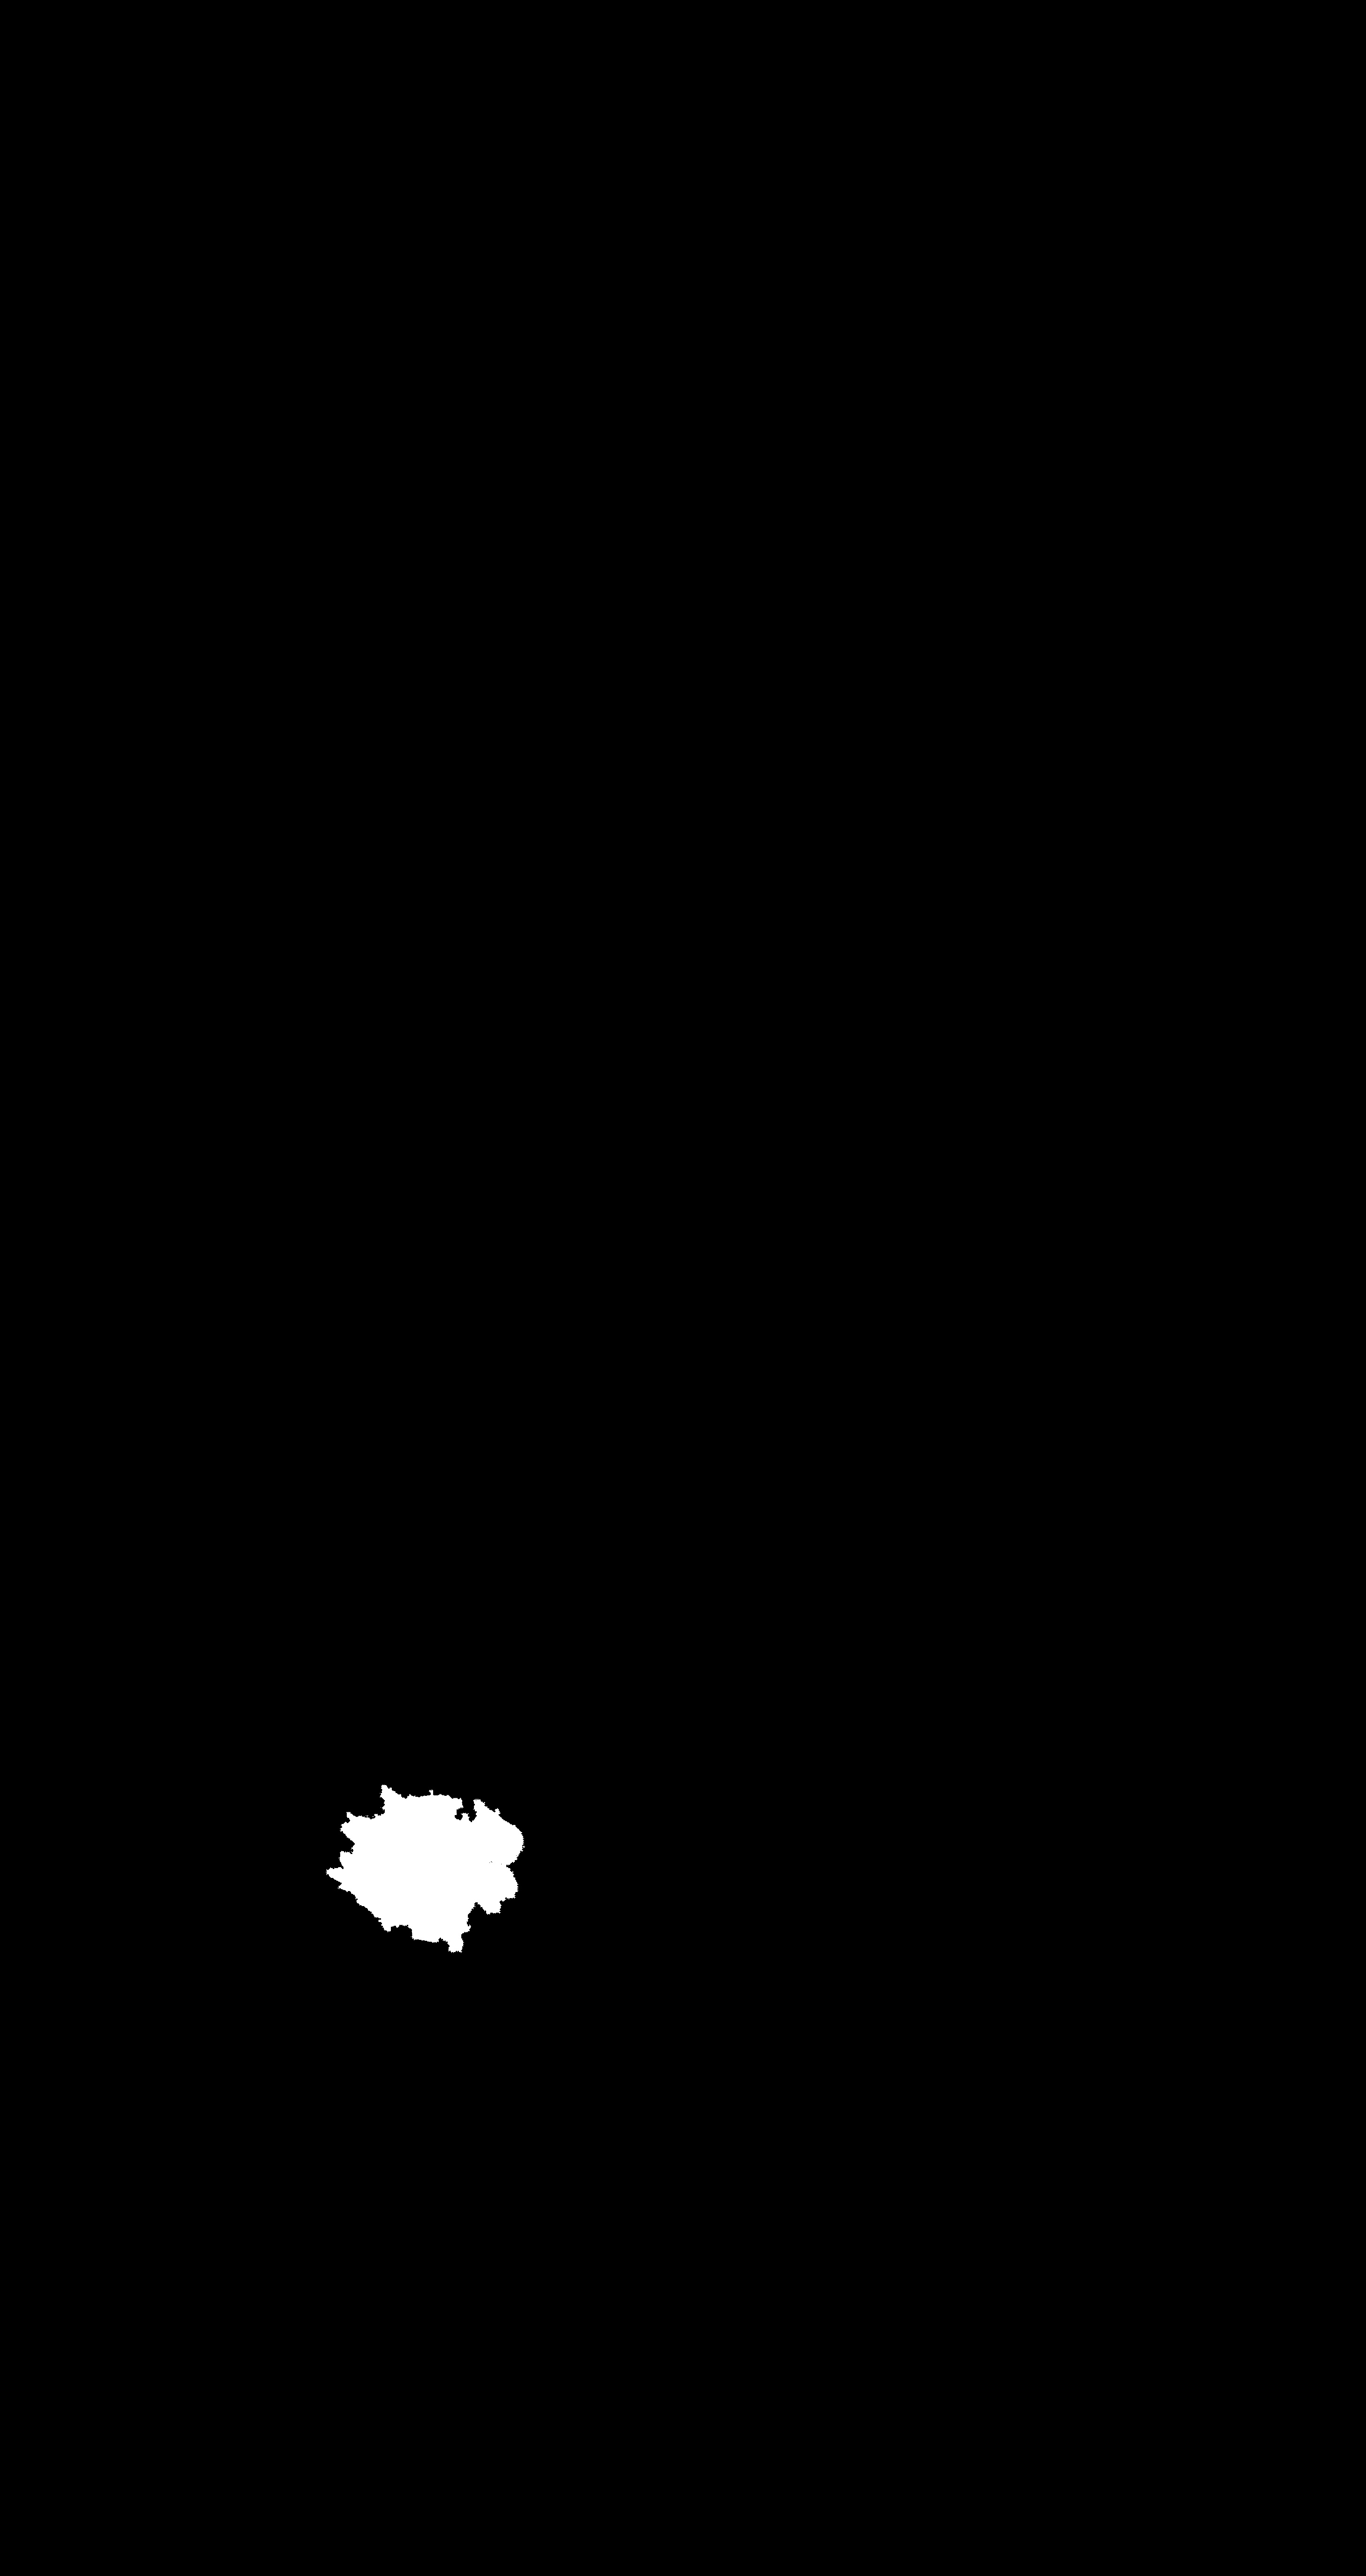

In [6]:
_Imgdis(folder,width=256,height=256)

# Implementing transfer learning

In [7]:
vgg = VGG16(input_shape= (IMAGE_SIZE, IMAGE_SIZE, 3), weights='imagenet', include_top= False)

58900480/58889256 [==============================] - 0s 0us/step


In [8]:
vgg.input

<KerasTensor: shape=(None, 64, 64, 3) dtype=float32 (created by layer 'input_1')>

In [9]:
for layer in vgg.layers:
    layer.trainable = False

In [10]:
folders = glob('/content/drive/MyDrive/Dataset/CBIS-DDSM/jpeg_shape_classes/train/*')
print(len(folders))

4


In [11]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation= 'softmax')(x)

model = Model(inputs=vgg.input, outputs = prediction)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [12]:
import tensorflow as tf 
from keras import optimizers

adam = tf.optimizers.Adam()

model.compile(loss='categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [13]:
data_gen = image.ImageDataGenerator(preprocessing_function= preprocess_input)

In [14]:
train_set = data_gen.flow_from_directory(train_path, target_size= (64,64), batch_size = 32, class_mode= 'categorical')
test_set = data_gen.flow_from_directory(test_path, target_size= (64,64), batch_size = 32, class_mode= 'categorical')

Found 1145 images belonging to 4 classes.
Found 331 images belonging to 4 classes.


# Training the model

In [15]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/Dataset/CBIS-DDSM/checkpoint/VGG.h5',verbose=2,save_best_only=True)

callbacks = [checkpoint]

In [16]:
history = model.fit(train_set,epochs=50,callbacks=callbacks,validation_data=test_set)

Epoch 1/50
36/36 [==============================] - ETA: 0s - loss: 2.6821 - accuracy: 0.2987
Epoch 1: val_loss improved from inf to 1.83056, saving model to /content/drive/MyDrive/Dataset/CBIS-DDSM/checkpoint/VGG.h5
36/36 [==============================] - 369s 10s/step - loss: 2.6821 - accuracy: 0.2987 - val_loss: 1.8306 - val_accuracy: 0.3505
Epoch 2/50
36/36 [==============================] - ETA: 0s - loss: 1.7142 - accuracy: 0.3231
Epoch 2: val_loss improved from 1.83056 to 1.70620, saving model to /content/drive/MyDrive/Dataset/CBIS-DDSM/checkpoint/VGG.h5
36/36 [==============================] - 68s 2s/step - loss: 1.7142 - accuracy: 0.3231 - val_loss: 1.7062 - val_accuracy: 0.2538
Epoch 3/50
36/36 [==============================] - ETA: 0s - loss: 1.4829 - accuracy: 0.3441
Epoch 3: val_loss improved from 1.70620 to 1.51230, saving model to /content/drive/MyDrive/Dataset/CBIS-DDSM/checkpoint/VGG.h5
36/36 [==============================] - 72s 2s/step - loss: 1.4829 - accuracy: 0

In [17]:
import matplotlib.pyplot as plt

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('accuracy_VGG_pretrain_all_layers.jpg', dpi = 400)
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss_VGG_pretrain_all_layers.jpg', dpi = 400)

In [21]:
y_test =test_set.labels
y_pred = model.predict(test_set)

In [28]:
y_pred

array([[7.2745562e-01, 1.5553880e-01, 9.6404985e-02, 2.0600583e-02],
       [1.6016176e-06, 9.9812800e-01, 2.9292578e-04, 1.5775375e-03],
       [6.1056539e-02, 3.4069885e-02, 8.7105453e-01, 3.3819068e-02],
       ...,
       [1.0726861e-01, 6.7803895e-01, 1.9411603e-01, 2.0576380e-02],
       [8.2412285e-01, 1.0752894e-01, 3.2603666e-02, 3.5744548e-02],
       [8.6302400e-01, 2.5478965e-03, 1.3416393e-01, 2.6413292e-04]],
      dtype=float32)

In [29]:
import numpy as np

In [32]:
y_pred_proccessed = []
for i in y_pred:
    index_max = np.argmax(i)
    y_pred_proccessed.append(index_max)

y_pred_proccessed = np.array(y_pred_proccessed, dtype= np.float32)

In [35]:
import sklearn.metrics as metrics

In [38]:
matrix = metrics.confusion_matrix(y_test, y_pred_proccessed)

In [41]:
import seaborn as sn
import pandas as pd

In [44]:
test_set

In [45]:
folders

['/content/drive/MyDrive/Dataset/CBIS-DDSM/jpeg_shape_classes/train/round',
 '/content/drive/MyDrive/Dataset/CBIS-DDSM/jpeg_shape_classes/train/oval',
 '/content/drive/MyDrive/Dataset/CBIS-DDSM/jpeg_shape_classes/train/lobulated',
 '/content/drive/MyDrive/Dataset/CBIS-DDSM/jpeg_shape_classes/train/irregular']

In [46]:
df_cm = pd.DataFrame(matrix, index = [i for i in ['round', 'oval', 'lobulated', 'irregular']],
                  columns = [i for i in ['round', 'oval', 'lobulated', 'irregular']])

In [ ]:
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap='BuPu')
plt.savefig('confmatrix_vgg_pretrain_all_layers.jpg',dpi=400)